In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [18]:
from google.colab import files
uploaded = files.upload()

Saving earthquake_data.csv to earthquake_data (1).csv


In [ ]:
# Load the earthquake dataset
data = pd.read_csv('/content/earthquake_data.csv')

In [ ]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

#Preprocessing


In [ ]:
data.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [ ]:
null_columns = data.loc[:, data.isna().sum() > 0.66 * data.shape[0]].columns

In [ ]:
data = data.drop(null_columns, axis=1)


In [ ]:
data.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [ ]:
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [ ]:
data = data.dropna(axis=0).reset_index(drop=True)

In [ ]:
data.isna().sum().sum()

0

#Freature Engineering


In [19]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed


In [20]:
data['Date'].apply(lambda x: x[0:2])

0        01
1        01
2        01
3        01
4        01
         ..
23404    12
23405    12
23406    12
23407    12
23408    12
Name: Date, Length: 23409, dtype: object

In [21]:
data['Month'] = data['Date'].apply(lambda x: x[0:2])
data['Year'] = data['Date'].apply(lambda x: x[-4:])

data = data.drop('Data', axis=1)

KeyError: ignored

In [22]:
data['Month'] = data['Month'].astype(np.int)
data['Year'] = data['Year'].astype(np.int)

NameError: ignored

In [23]:
data['Year'].str.contains('Z')

0        False
1        False
2        False
3        False
4        False
         ...  
23404    False
23405    False
23406    False
23407    False
23408    False
Name: Year, Length: 23409, dtype: bool

In [24]:
data[data['Year'].str.contains('Z')]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,USP0000A09,US,US,US,Reviewed,19,000Z
7510,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,USP0002E81,US,US,HRV,Reviewed,19,530Z
20647,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,USP000HWQP,US,US,GCMT,Reviewed,20,520Z


In [25]:
invalid_year_indices = data[data['Year'].str.contains('Z')].intex
data = data.drop(invalid_year_indices, axis=0).reset_index(drop=True)

AttributeError: ignored

In [26]:
data['Year'] = data['Year'].astype(np.int)

NameError: ignored

In [27]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01-02-1965,13:44:18,19.246,145.616,131.6,6.0
1,01-04-1965,11:29:49,1.863,127.352,80.0,5.8
2,01-05-1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01-08-1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01-09-1965,13:32:50,11.938,126.427,15.0,5.8


In [28]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

<ipython-input-28-2a70f8d0d702>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = timeStamp.values


,Latitude,Longitude,Depth,Magnitude,Timestamp
7,-13.309,166.212,35.0,6.0,-156472938.0
8,-56.452,-27.043,95.0,6.0,-156428843.0
9,-24.563,178.487,565.0,5.8,-156345403.0
10,-6.807,108.988,227.9,5.9,-156308539.0
11,-2.608,125.952,20.0,8.2,-155778523.0


#Data Visualization

In [29]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

<ipython-input-29-2a70f8d0d702>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = timeStamp.values


,Latitude,Longitude,Depth,Magnitude,Timestamp
7,-13.309,166.212,35.0,6.0,-156472938.0
8,-56.452,-27.043,95.0,6.0,-156428843.0
9,-24.563,178.487,565.0,5.8,-156345403.0
10,-6.807,108.988,227.9,5.9,-156308539.0
11,-2.608,125.952,20.0,8.2,-155778523.0


In [31]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.10.2-1).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
     / 129.7 MB 18.3 MB/s 0:00:12
ERROR: https://github.com/matplotlib/basemap/archive/master.zip does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


ModuleNotFoundError: ignored

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

ModuleNotFoundError: ignored

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


ModuleNotFoundError: ignored

In [32]:
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install geopandas
!pip install descartes
!pip install geopy
!pip install folium


In [35]:
!kaggle datasets download -d usgs/earthquake-database
!unzip earthquake-database.zip



Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open earthquake-database.zip, earthquake-database.zip.zip or earthquake-database.zip.ZIP.


In [37]:
!pip install numpy pandas matplotlib


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

rcParams['figure.figsize'] = (14, 10)

# Load the dataset
data = pd.read_csv('database.csv')

# Data visualization on a world map
plt.figure(figsize=(16, 8))
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcountries()
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 60.), labels=[0, 0, 0, 1])

# Convert latitude and longitude to coordinates
lons = data['Longitude'].values
lats = data['Latitude'].values
x, y = m(lons, lats)

# Plotting the data points
m.scatter(x, y, marker='o', color='r', zorder=5)
plt.title('Earthquake Visualization')
plt.show()


ModuleNotFoundError: ignored

In [38]:
!pip install geopandas
!pip install descartes


In [42]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload your Kaggle API key file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d usgs/earthquake-database
!unzip earthquake-database.zip

import pandas as pd
data = pd.read_csv('earthquake_data.csv')


Saving earthquake_data.csv to earthquake_data (3).csv
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open earthquake-database.zip, earthquake-database.zip.zip or earthquake-database.zip.ZIP.


<ipython-input-43-00c512b49c89>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


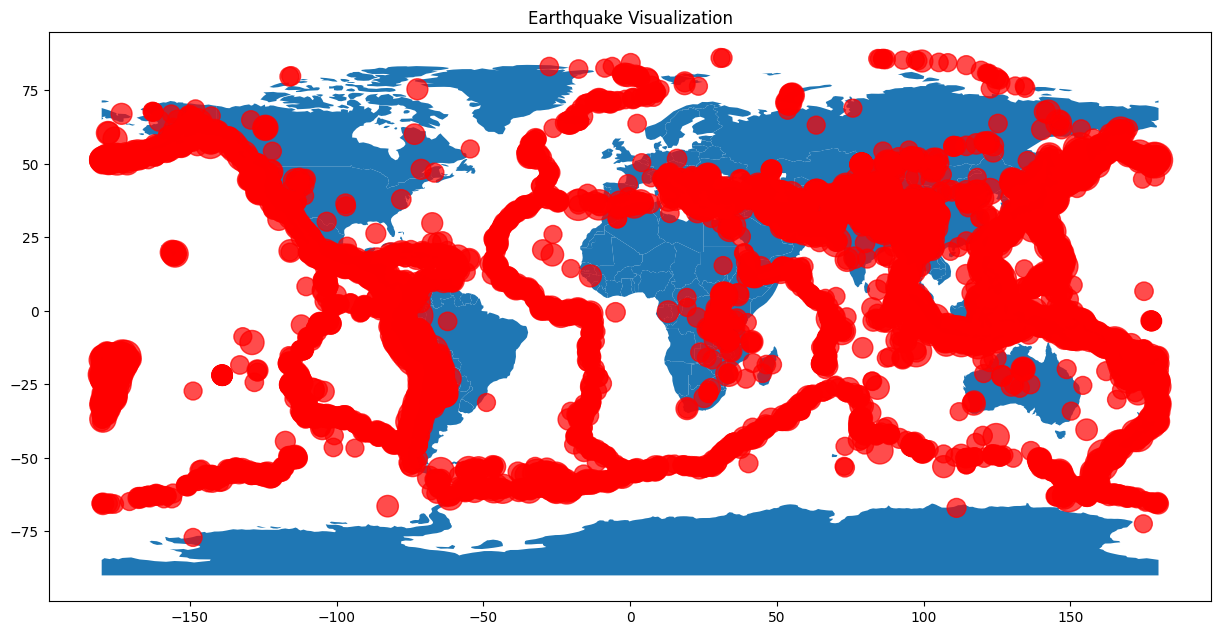

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))

# Plotting earthquake data
plt.scatter(data['Longitude'], data['Latitude'], c='red', marker='o', alpha=0.7, s=data['Magnitude'] ** 3)

plt.title('Earthquake Visualization')
plt.show()


  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<ipython-input-45-8fe738007afb>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


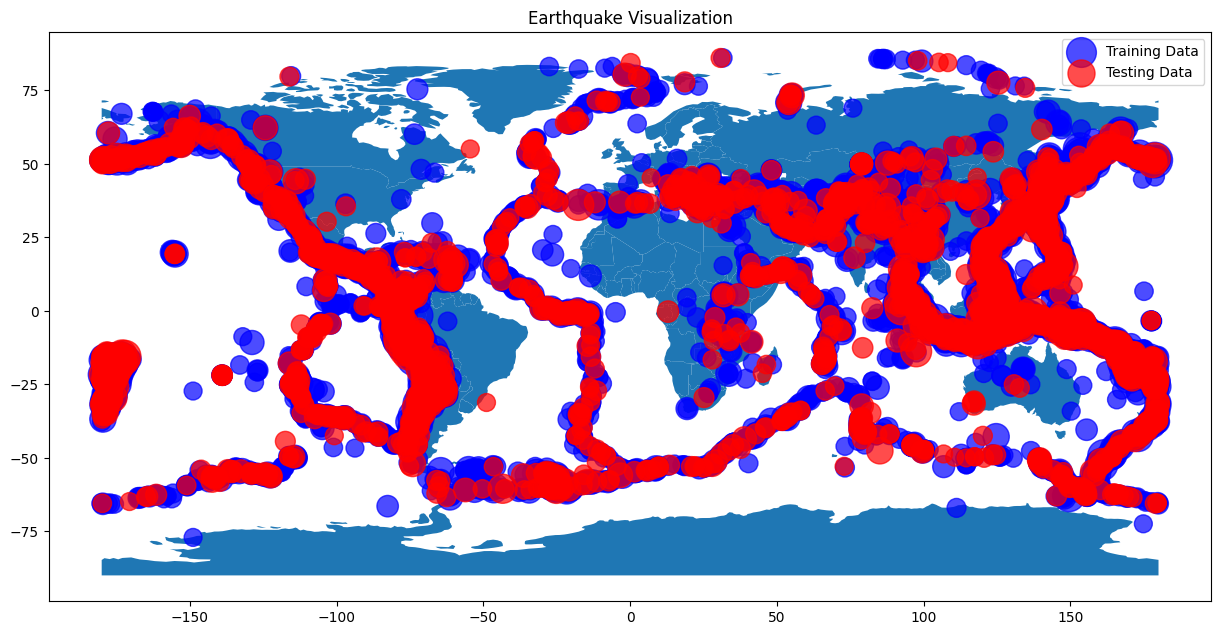

In [45]:
!pip install geopandas
!pip install descartes
!pip install sklearn

# Rest of the code for setting up Kaggle API and downloading the dataset

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('earthquake_data.csv')

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Rest of the code for data visualization
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))

# Plotting earthquake data
plt.scatter(train_data['Longitude'], train_data['Latitude'], c='blue', marker='o', alpha=0.7, s=train_data['Magnitude'] ** 3, label='Training Data')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c='red', marker='o', alpha=0.7, s=test_data['Magnitude'] ** 3, label='Testing Data')

plt.title('Earthquake Visualization')
plt.legend()
plt.show()
